In [1]:
from BertFineTuning.loader import *
from BertFineTuning.loader_config import default_loader_config
from BertFineTuning.question_answering import *
from transformers.optimization import AdamW
import torch
%matplotlib inline

In [2]:
BFT=BertFineTuning()

In [3]:
BFT.criterion=nn.CrossEntropyLoss(ignore_index=-1)
BFT.optimizer = AdamW(BFT.model.parameters())
BFT.scheduler=torch.optim.lr_scheduler.MultiStepLR(BFT.optimizer, milestones=[])

In [4]:
dataloader_config={
# 'bert_train_split':default_loader_config,
# 'bert_test_split':default_loader_config,
# 'bert_valid_split':default_loader_config,
'dev_v1_1_1':default_loader_config
}

In [5]:
model_config

{'num_classes': 2,
 'dropout_prob': 0.1,
 'in_features': 768,
 'learning_rate_PT': 1e-05,
 'learning_rate_CLS': 0.001,
 'weight_decay': 0.0005,
 'max_token_length': 100,
 'device': device(type='cuda', index=0)}

In [6]:
cwd = os.getcwd()
processed_data_folder=os.path.join(cwd,'data','processed')
ml=MultiLoader(processed_data_folder,dataloader_config,model_config)

In [7]:
BFT.train(model_config,ml.dev_v1_1_1,ml.dev_v1_1_1,epochs=100,print_every=10,validate_at_epoch=0)

epoch:  1  step:  1 / 49
Batch Loss:  4.7103887
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: -0.008264462809917356, 1.0: -0.008264462809917356}
Accuracy:  {0.0: 0.9800363636363636, 1.0: 0.9800363636363636}
{'F1 Macro ': 0.49586776859504134} {'F1 Micro': 0.9800363636363636}
{'F1 ': {0.0: 0.9899173553719008, 1.0: 0.0018181818181818182}}
Precision:  {0.0: 0.9899173553719008, 1.0: 0.0018181818181818182}
recall:  {0.0: 0.9899173553719008, 1.0: 0.0018181818181818182}
Predict      0.0          1.0          
Actual
0.0          107802       1098         

1.0          1098         2            


epoch:  1  step:  2 / 49
Batch Loss:  4.644676
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: -0.005509641873278237, 1.0: -0.005509641873278237}
Accuracy:  {0.0: 0.9800909090909091, 1.0: 0.9800909090909091}
{'F1 Macro ': 0.49724517906336085} {'F1 Micro': 0.9800909090909091}
{'F1 ': {0.0: 0.9899449035812672, 1.0: 0.004545454545454545}}
Precision:  {0.0: 0.9899449035812672, 1.0: 0.00

epoch:  1  step:  15 / 49
Batch Loss:  4.3838873
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.021120293847566574, 1.0: 0.021120293847566574}
Accuracy:  {0.0: 0.9806181818181818, 1.0: 0.9806181818181818}
{'F1 Macro ': 0.5105601469237833} {'F1 Micro': 0.9806181818181818}
{'F1 ': {0.0: 0.9902112029384756, 1.0: 0.03090909090909091}}
Precision:  {0.0: 0.9902112029384756, 1.0: 0.03090909090909091}
recall:  {0.0: 0.9902112029384756, 1.0: 0.03090909090909091}
Predict      0.0          1.0          
Actual
0.0          107834       1066         

1.0          1066         34           


epoch:  1  step:  16 / 49
Batch Loss:  4.2676487
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.027548209366391185, 1.0: 0.027548209366391185}
Accuracy:  {0.0: 0.9807454545454546, 1.0: 0.9807454545454546}
{'F1 Macro ': 0.5137741046831956} {'F1 Micro': 0.9807454545454546}
{'F1 ': {0.0: 0.9902754820936639, 1.0: 0.03727272727272727}}
Precision:  {0.0: 0.9902754820936639, 1.0: 0.037272727272

epoch:  1  step:  29 / 49
Batch Loss:  4.3250957
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.0027548209366391185, 1.0: 0.0027548209366391185}
Accuracy:  {0.0: 0.9802545454545455, 1.0: 0.9802545454545455}
{'F1 Macro ': 0.5013774104683195} {'F1 Micro': 0.9802545454545455}
{'F1 ': {0.0: 0.9900275482093663, 1.0: 0.012727272727272728}}
Precision:  {0.0: 0.9900275482093663, 1.0: 0.012727272727272728}
recall:  {0.0: 0.9900275482093663, 1.0: 0.012727272727272728}
Predict      0.0          1.0          
Actual
0.0          107814       1086         

1.0          1086         14           


epoch:  1  step:  30 / 49
Batch Loss:  4.3063984
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.0027548209366391185, 1.0: 0.0027548209366391185}
Accuracy:  {0.0: 0.9802545454545455, 1.0: 0.9802545454545455}
{'F1 Macro ': 0.5013774104683195} {'F1 Micro': 0.9802545454545455}
{'F1 ': {0.0: 0.9900275482093663, 1.0: 0.012727272727272728}}
Precision:  {0.0: 0.9900275482093663, 1.0: 0.0127

epoch:  1  step:  43 / 49
Batch Loss:  4.22792
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.03673094582185491, 1.0: 0.03673094582185491}
Accuracy:  {0.0: 0.9809272727272728, 1.0: 0.9809272727272728}
{'F1 Macro ': 0.5183654729109275} {'F1 Micro': 0.9809272727272728}
{'F1 ': {0.0: 0.9903673094582186, 1.0: 0.046363636363636364}}
Precision:  {0.0: 0.9903673094582186, 1.0: 0.046363636363636364}
recall:  {0.0: 0.9903673094582186, 1.0: 0.046363636363636364}
Predict      0.0          1.0          
Actual
0.0          107851       1049         

1.0          1049         51           


epoch:  1  step:  44 / 49
Batch Loss:  4.258733
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.017447199265381085, 1.0: 0.017447199265381085}
Accuracy:  {0.0: 0.9805454545454545, 1.0: 0.9805454545454545}
{'F1 Macro ': 0.5087235996326905} {'F1 Micro': 0.9805454545454545}
{'F1 ': {0.0: 0.9901744719926538, 1.0: 0.02727272727272727}}
Precision:  {0.0: 0.9901744719926538, 1.0: 0.02727272727272

epoch:  2  step:  8 / 49
Batch Loss:  4.2421694
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.01928374655647383, 1.0: 0.01928374655647383}
Accuracy:  {0.0: 0.9805818181818182, 1.0: 0.9805818181818182}
{'F1 Macro ': 0.509641873278237} {'F1 Micro': 0.9805818181818182}
{'F1 ': {0.0: 0.9901928374655647, 1.0: 0.02909090909090909}}
Precision:  {0.0: 0.9901928374655647, 1.0: 0.02909090909090909}
recall:  {0.0: 0.9901928374655647, 1.0: 0.02909090909090909}
Predict      0.0          1.0          
Actual
0.0          107832       1068         

1.0          1068         32           


epoch:  2  step:  9 / 49
Batch Loss:  4.2255783
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.021120293847566574, 1.0: 0.021120293847566574}
Accuracy:  {0.0: 0.9806181818181818, 1.0: 0.9806181818181818}
{'F1 Macro ': 0.5105601469237833} {'F1 Micro': 0.9806181818181818}
{'F1 ': {0.0: 0.9902112029384756, 1.0: 0.03090909090909091}}
Precision:  {0.0: 0.9902112029384756, 1.0: 0.03090909090909091

epoch:  2  step:  22 / 49
Batch Loss:  4.2793493
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.004591368227731864, 1.0: 0.004591368227731864}
Accuracy:  {0.0: 0.9802909090909091, 1.0: 0.9802909090909091}
{'F1 Macro ': 0.5022956841138659} {'F1 Micro': 0.9802909090909091}
{'F1 ': {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}}
Precision:  {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}
recall:  {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}
Predict      0.0          1.0          
Actual
0.0          107816       1084         

1.0          1084         16           


epoch:  2  step:  23 / 49
Batch Loss:  4.220075
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.0, 1.0: 0.0}
Accuracy:  {0.0: 0.9802, 1.0: 0.9802}
{'F1 Macro ': 0.5} {'F1 Micro': 0.9802}
{'F1 ': {0.0: 0.99, 1.0: 0.01}}
Precision:  {0.0: 0.99, 1.0: 0.01}
recall:  {0.0: 0.99, 1.0: 0.01}
Predict      0.0          1.0          
Actual
0.0          107811       1089         

1.0          1

epoch:  2  step:  37 / 49
Batch Loss:  4.264913
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.0, 1.0: 0.0}
Accuracy:  {0.0: 0.9802, 1.0: 0.9802}
{'F1 Macro ': 0.5} {'F1 Micro': 0.9802}
{'F1 ': {0.0: 0.99, 1.0: 0.01}}
Precision:  {0.0: 0.99, 1.0: 0.01}
recall:  {0.0: 0.99, 1.0: 0.01}
Predict      0.0          1.0          
Actual
0.0          107811       1089         

1.0          1089         11           


epoch:  2  step:  38 / 49
Batch Loss:  4.3636966
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: -0.006427915518824609, 1.0: -0.006427915518824609}
Accuracy:  {0.0: 0.9800727272727273, 1.0: 0.9800727272727273}
{'F1 Macro ': 0.4967860422405877} {'F1 Micro': 0.9800727272727273}
{'F1 ': {0.0: 0.9899357208448117, 1.0: 0.0036363636363636364}}
Precision:  {0.0: 0.9899357208448117, 1.0: 0.0036363636363636364}
recall:  {0.0: 0.9899357208448117, 1.0: 0.0036363636363636364}
Predict      0.0          1.0          
Actual
0.0          107804       1096         

1.0      

epoch:  3  step:  3 / 49
Batch Loss:  4.2678504
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.017447199265381085, 1.0: 0.017447199265381085}
Accuracy:  {0.0: 0.9805454545454545, 1.0: 0.9805454545454545}
{'F1 Macro ': 0.5087235996326905} {'F1 Micro': 0.9805454545454545}
{'F1 ': {0.0: 0.9901744719926538, 1.0: 0.02727272727272727}}
Precision:  {0.0: 0.9901744719926538, 1.0: 0.02727272727272727}
recall:  {0.0: 0.9901744719926538, 1.0: 0.02727272727272727}
Predict      0.0          1.0          
Actual
0.0          107830       1070         

1.0          1070         30           


epoch:  3  step:  4 / 49
Batch Loss:  4.255653
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.02295684113865932, 1.0: 0.02295684113865932}
Accuracy:  {0.0: 0.9806545454545454, 1.0: 0.9806545454545454}
{'F1 Macro ': 0.5114784205693297} {'F1 Micro': 0.9806545454545454}
{'F1 ': {0.0: 0.9902295684113865, 1.0: 0.03272727272727273}}
Precision:  {0.0: 0.9902295684113865, 1.0: 0.03272727272727273

epoch:  3  step:  17 / 49
Batch Loss:  4.232439
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.004591368227731864, 1.0: 0.004591368227731864}
Accuracy:  {0.0: 0.9802909090909091, 1.0: 0.9802909090909091}
{'F1 Macro ': 0.5022956841138659} {'F1 Micro': 0.9802909090909091}
{'F1 ': {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}}
Precision:  {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}
recall:  {0.0: 0.9900459136822773, 1.0: 0.014545454545454545}
Predict      0.0          1.0          
Actual
0.0          107816       1084         

1.0          1084         16           


epoch:  3  step:  18 / 49
Batch Loss:  4.2540355
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.005509641873278237, 1.0: 0.005509641873278237}
Accuracy:  {0.0: 0.9803090909090909, 1.0: 0.9803090909090909}
{'F1 Macro ': 0.5027548209366391} {'F1 Micro': 0.9803090909090909}
{'F1 ': {0.0: 0.9900550964187328, 1.0: 0.015454545454545455}}
Precision:  {0.0: 0.9900550964187328, 1.0: 0.015454545

epoch:  3  step:  31 / 49
Batch Loss:  4.283898
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.013774104683195593, 1.0: 0.013774104683195593}
Accuracy:  {0.0: 0.9804727272727273, 1.0: 0.9804727272727273}
{'F1 Macro ': 0.5068870523415978} {'F1 Micro': 0.9804727272727273}
{'F1 ': {0.0: 0.9901377410468319, 1.0: 0.023636363636363636}}
Precision:  {0.0: 0.9901377410468319, 1.0: 0.023636363636363636}
recall:  {0.0: 0.9901377410468319, 1.0: 0.023636363636363636}
Predict      0.0          1.0          
Actual
0.0          107826       1074         

1.0          1074         26           


epoch:  3  step:  32 / 49
Batch Loss:  4.3029304
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.006427915518824609, 1.0: 0.006427915518824609}
Accuracy:  {0.0: 0.9803272727272727, 1.0: 0.9803272727272727}
{'F1 Macro ': 0.5032139577594124} {'F1 Micro': 0.9803272727272727}
{'F1 ': {0.0: 0.9900642791551882, 1.0: 0.016363636363636365}}
Precision:  {0.0: 0.9900642791551882, 1.0: 0.016363636

KeyboardInterrupt: 

In [6]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

In [ ]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,4900)],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss',grid=True)
ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")

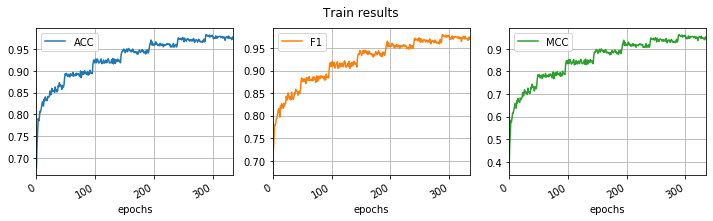

In [11]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Train results',grid=True);

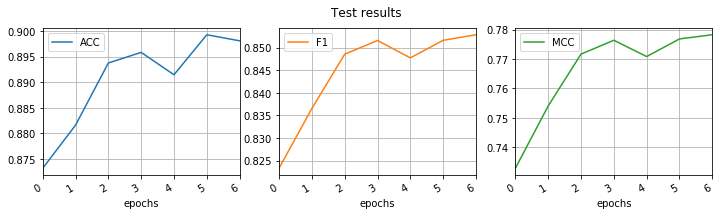

In [12]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Test results',grid=True);

In [5]:
from transformers import BertTokenizer, BertForQuestionAnswering,DistilBertForQuestionAnswering, BertConfig

In [10]:
x=BertForQuestionAnswering.from_pretrained('bert-base-uncased')

In [7]:
import pandas as pd
%matplotlib inline

In [8]:
df=pd.read_csv('./data/processed/dev_v1_1_1.csv')

In [14]:
df.head()

,Unnamed: 0,qa_id,start_label,end_label,text,total_tokens
0,0,5733be284776f41900661182,130,138,[CLS] To whom did the Virgin Mary allegedly ap...,192
1,1,5733be284776f4190066117f,52,57,[CLS] What is in front of the Notre Dame Main ...,184
2,2,5733be284776f41900661180,28,31,[CLS] The Basilica of the Sacred heart at Notr...,192
3,3,5733be284776f41900661181,95,102,[CLS] What is the Grotto at Notre Dame? [SEP] ...,180
4,4,5733be284776f4190066117e,33,40,[CLS] What sits on top of the Main Building at...,186


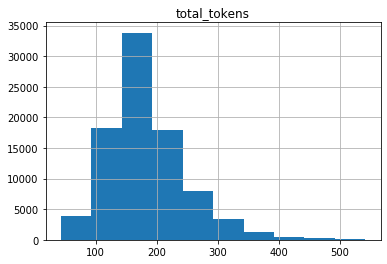

In [15]:
df.hist('total_tokens');

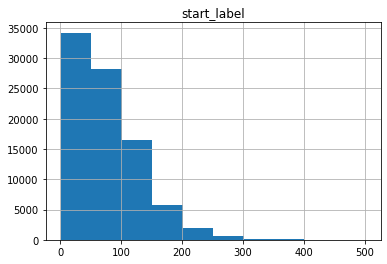

In [12]:
df.hist('start_label');

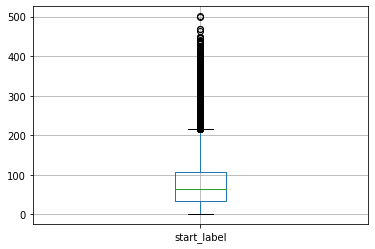

In [13]:
df.boxplot('start_label');

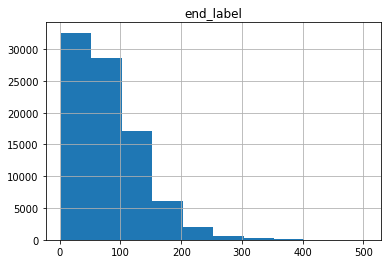

In [11]:
df.hist('end_label');

In [16]:
df[df.isna()].shape

(87598, 10)

In [17]:
new_df=df[~df.isna()]

In [18]:
new_df.to_csv('./data/processed/dev_v1_1_2.csv')